In [1]:
import pandas as pd
import acquire
import os

import matplotlib.pyplot as plt
import seaborn as sns

Using your store items data:

Convert date column to datetime format.

Plot the distribution of sale_amount and item_price.

Set the index to be the datetime variable.

Add a 'month' and 'day of week' column to your dataframe.

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [2]:
df = acquire.main()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 1 to 10
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_brand     913000 non-null  object 
 1   item_name      913000 non-null  object 
 2   item_price     913000 non-null  float64
 3   item_upc12     913000 non-null  int64  
 4   item_upc14     913000 non-null  int64  
 5   sale_amount    913000 non-null  float64
 6   sale_date      913000 non-null  object 
 7   sale_id        913000 non-null  int64  
 8   store_address  913000 non-null  object 
 9   store_city     913000 non-null  object 
 10  store_state    913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 90.6+ MB


In [4]:
# Reassign the sale_date column to be a datetime type

df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

In [ ]:
# Plot of the distribution of sale_amount to item_price

sns.histplot(data = df, x = 'sale_amount')
# sns.histplot(data = df, x = 'item_price')

In [11]:
# Set the index as that date and then sort index (by the date)

df = df.set_index("sale_date").sort_index()

In [12]:
# Add a 'month' and 'day of week' column to your dataframe.

df['month'] = df.index.strftime('%m') + ' ' + df.index.strftime('%b')

df['day_of_week'] = df.index.strftime('%w') + ' ' + df.index.strftime('%a')

In [13]:
df.head(1)

,item_brand,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01 Jan,2 Tue


In [14]:
# Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

df['sales_total'] = df.sale_amount * df.item_price

In [15]:
df.head()

,item_brand,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01 Jan,2 Tue,10.92
2013-01-01 00:00:00+00:00,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,26.0,295813,2118 Fredericksburg Rdj,San Antonio,TX,78201,01 Jan,2 Tue,30.16
2013-01-01 00:00:00+00:00,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,32.0,125995,8503 NW Military Hwy,San Antonio,TX,78231,01 Jan,2 Tue,308.48
2013-01-01 00:00:00+00:00,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,45.0,314073,2118 Fredericksburg Rdj,San Antonio,TX,78201,01 Jan,2 Tue,197.55
2013-01-01 00:00:00+00:00,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,34.0,332333,2118 Fredericksburg Rdj,San Antonio,TX,78201,01 Jan,2 Tue,25.16


Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

Convert date column to datetime format.

Plot the distribution of each of your variables.

Set the index to be the datetime variable.

Add a month and a year column to your dataframe.

Fill any missing values.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [16]:
df = acquire.get_power_systems()

In [17]:
df.head(15)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN
5,2006-01-06,1403.427,NaN,NaN,NaN
6,2006-01-07,1300.287,NaN,NaN,NaN
7,2006-01-08,1207.985,NaN,NaN,NaN
8,2006-01-09,1529.323,NaN,NaN,NaN
9,2006-01-10,1576.911,NaN,NaN,NaN


In [18]:
#Convert date column to datetime format.
df.Date = pd.to_datetime(df.Date, format = '%Y-%m-%d')

In [19]:
# Set the index to be the datetime variable. (I will also sort)
df = df.set_index('Date').sort_index()

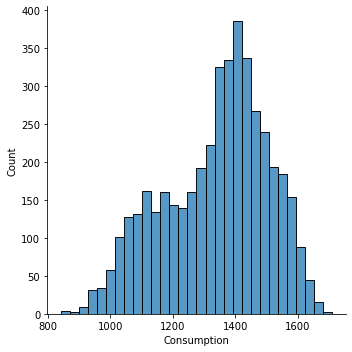

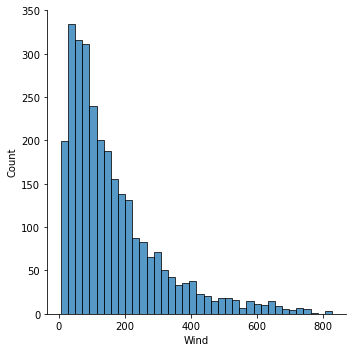

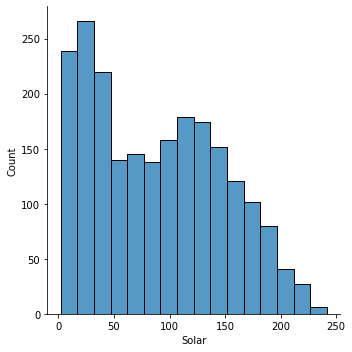

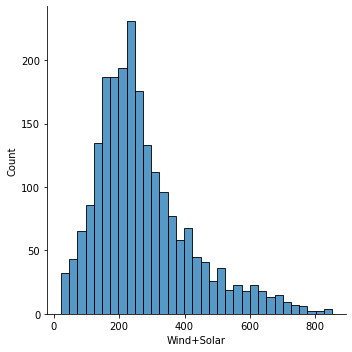

In [20]:
# Plot the distribution of each of your variables.

for column in df.columns:
    sns.displot(data = df, x=column)

In [26]:
# Add a month and a year column to your dataframe.

df['month'] = df.index.strftime('%m') + ' ' + df.index.strftime('%b')

df['year'] = df.index.year

In [22]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,01 Jan,2006
2006-01-02,1380.521,NaN,NaN,NaN,01 Jan,2006
2006-01-03,1442.533,NaN,NaN,NaN,01 Jan,2006
2006-01-04,1457.217,NaN,NaN,NaN,01 Jan,2006
2006-01-05,1477.131,NaN,NaN,NaN,01 Jan,2006


In [27]:
# Fill any missing values.
df.bfill()
df.ffill()
df.fillna(0)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,01 Jan,2006
2006-01-02,1380.52100,0.000,0.000,0.000,01 Jan,2006
2006-01-03,1442.53300,0.000,0.000,0.000,01 Jan,2006
2006-01-04,1457.21700,0.000,0.000,0.000,01 Jan,2006
2006-01-05,1477.13100,0.000,0.000,0.000,01 Jan,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12 Dec,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12 Dec,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12 Dec,2017


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [ ]:
df.wind